In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv(r"C:\Users\HP\Desktop\ASHFA\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [106]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US_DA = df_US_DA.dropna(subset=['salary_year_avg'])
df_US_DA_exploded = df_US_DA.explode('job_skills')
df_US_DA_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [107]:
df_US_DA_skills = df_US_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_US_DA_skills = df_US_DA_skills.rename(columns = {'count':'skill_counts','median':'salary_median'})

In [108]:
df_US_DA_skills

,skill_counts,salary_median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [109]:
df_US_DA_job_count = len(df_US_DA)
df_US_DA_job_count

4350

In [110]:
df_US_DA_skills['percentage'] = (df_US_DA_skills['skill_counts'] / df_US_DA_job_count) * 100
df_US_DA_skills

,skill_counts,salary_median,percentage
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [111]:
skill_limit = 5

df_DA_skills_high_demand= df_US_DA_skills[df_US_DA_skills['percentage'] > skill_limit ]
df_DA_skills_high_demand

,skill_counts,salary_median,percentage
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


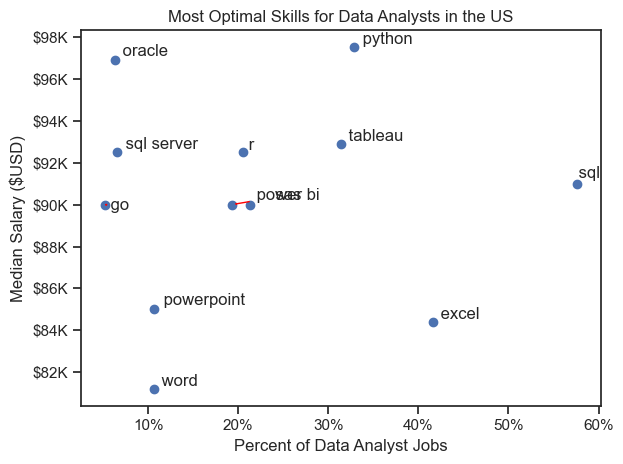

In [112]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['percentage'], df_DA_skills_high_demand['salary_median'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))  # Format x-axis as percentage

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['percentage'].iloc[i], df_DA_skills_high_demand['salary_median'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

In [113]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['microstrategy',
  'outlook',
  'powerpoint',
  'tableau',
  'ssis',
  'spreadsheet',
  'datarobot',
  'spss',
  'alteryx',
  'powerbi',
  'sharepoint',
  'nuix',
  'splunk',
  'sheets',
  'ms access',
  'msaccess',
  'ssrs',
  'excel',
  'power bi',
  'looker',
  'dax',
  'visio',
  'qlik',
  'esquisse',
  'cognos',
  'sas',
  'word',
  'sap'],
 'programming': ['scala',
  'objective-c',
  'cobol',
  'c',
  't-sql',
  'javascript',
  'julia',
  'ruby',
  'r',
  'vb.net',
  'css',
  'haskell',
  'ocaml',
  'visual basic',
  'delphi',
  'solidity',
  'kotlin',
  'f#',
  'crystal',
  'elixir',
  'sql',
  'c#',
  'pascal',
  'assembly',
  'typescript',
  'mongo',
  'no-sql',
  'matlab',
  'visualbasic',
  'golang',
  'sass',
  'php',
  'html',
  'shell',
  'java',
  'dart',
  'apl',
  'perl',
  'erlang',
  'fortran',
  'python',
  'bash',
  'rust',
  'go',
  'c++',
  'groovy',
  'mongodb',
  'swift',
  'lua',
  'sas',
  'lisp',
  'vba',
  'clojure',
  'nosql',
  'powersh

In [114]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['Technology', 'Skills'])
df_technology = df_technology.explode('Skills')
df_technology

,Technology,Skills
0,analyst_tools,microstrategy
0,analyst_tools,outlook
0,analyst_tools,powerpoint
0,analyst_tools,tableau
0,analyst_tools,ssis
...,...,...
9,sync,google chat
9,sync,symphony
9,sync,unify
9,sync,mattermost


In [115]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_US_DA_skills.merge(df_technology, left_on='job_skills', right_on='Skills')

df_DA_skills_tech

,skill_counts,salary_median,percentage,Technology,Skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,100000.0,0.022989,libraries,theano
170,1,65000.0,0.022989,programming,typescript
171,1,147500.0,0.022989,cloud,vmware
172,1,65000.0,0.022989,webframeworks,vue


In [116]:
df_DA_skills_tech = df_DA_skills_tech[df_DA_skills_tech['percentage'] > skill_limit ] 
df_DA_skills_tech

,skill_counts,salary_median,percentage,Technology,Skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


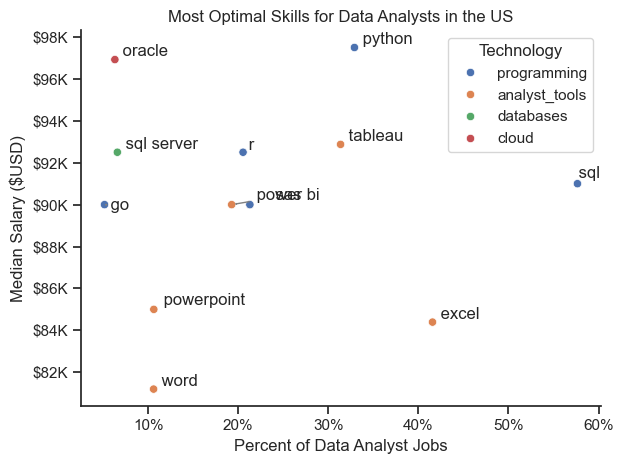

In [120]:
sns.scatterplot(
    data=df_DA_skills_tech,
    x='percentage',
    y='salary_median',
    hue='Technology'
)

sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))  # Format x-axis as percentage

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['percentage'].iloc[i], df_DA_skills_high_demand['salary_median'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.show()
